<a href="https://colab.research.google.com/github/mrsferret/Code-Division/blob/main/Projects/Sea_Level_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using numpy to look for a correlation between time data and sea level rise
---

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv

For this exercise:
*  import the pandas library
*  import the numpy library
*  read the csv dataset containing data on sea-levels from the year 1880 to 2013 into a dataframe (df)
*  use df.head() and df.info() to inspect the data and the column data types



In [7]:
import pandas as pd

#===============================================================================
# Start Here
#===============================================================================
# read csv file into a dataframe
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv'
df = pd.read_csv(url)

# Change the column names as don't like field names with spaces!
df.columns =['Year', 'CSIRO_Adj_Sea_Level', 'Lower_Err_Bound', 'Upper_Err_Bound', 'NOAA_Adj_Sea_Level']

# get some info about the dataframe
print (df.info())
print (df.head())
print (df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 134 non-null    int64  
 1   CSIRO_Adj_Sea_Level  134 non-null    float64
 2   Lower_Err_Bound      134 non-null    float64
 3   Upper_Err_Bound      134 non-null    float64
 4   NOAA_Adj_Sea_Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB
None
   Year  CSIRO_Adj_Sea_Level  Lower_Err_Bound  Upper_Err_Bound  \
0  1880             0.000000        -0.952756         0.952756   
1  1881             0.220472        -0.732283         1.173228   
2  1882            -0.440945        -1.346457         0.464567   
3  1883            -0.232283        -1.129921         0.665354   
4  1884             0.590551        -0.283465         1.464567   

   NOAA_Adj_Sea_Level  
0                 NaN  
1                 NaN  
2                 NaN 

---
### **Notes from Running Above Cell**

---
After running this cell, we have some basic information about this dataframe. It consists of 134 rows x 5 columns.
From `df.info` we can see the column names, the number of non-empty values each column contains (and consequently if the column contains missing values) and the datatype of the column as follows:
```
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 134 non-null    int64  
 1   CSIRO_Adj_Sea_Level  134 non-null    float64
 2   Lower_Err_Bound      134 non-null    float64
 3   Upper_Err_Bound      134 non-null    float64
 4   NOAA_Adj_Sea_Level   21 non-null     float64

```
The only column that has missing values is NOAA_Adj_Sea_Level.

We can also see that the data appears to be tracking changes in sea-level by year. The earliest year that the dataframe has data for is 1880 and the most recent is 2013. 

It looks like all sea level changes are measured relative to that recorded in  1880 as its level is recorded as 0.0. The greatest change was a rise of 9.326772 and the lowest was a decrease of -0.440945. 

The mean sea level change is 3.650341.














---


**Scatter Plot and Line of Best Fit**


---



The following cell takes the 2 numpy arrays of Sea Level and Year data and charts them in a scatter plot and then undergoes linear regression to plot the line of best fit.

The line of best fit is added by creating a regression variable and assigning the result of using linregress (`regression = linregress(x,y)` ). The slope and intercept are stored (`slope = regression.slope`, `intercept = regression.intercept`) and used to plot a line using `plt.plot(x, slope*x + intercept)` 

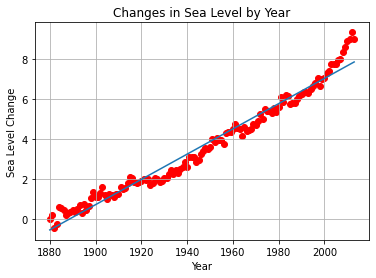

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

def convert_to_numpy_array(df):
  #============================================================================
  # Create 2 numpy arrays from input df - one of Years and other of Sea Levels
  #============================================================================
  year_array = df['Year'].to_numpy(np.int16)
  
  level_array = df['CSIRO_Adj_Sea_Level'].to_numpy()
  
  return year_array, level_array

def chart_sea_level_stats(year_array, level_array):
  #============================================================================
  # using the year_array and level_array, produces a scatter plot of levels vs 
  # years and then calculate a line of best fit and superimpose on the
  # scatterplot
  #============================================================================
  x = year_array
  y = level_array
  #display(x)
  #display(y)

  plt.scatter(x,y, color= 'red')
  plt.xlabel('Year')
  plt.ylabel('Sea Level Change')
  plt.title('Changes in Sea Level by Year')
  plt.grid()

  regression = linregress(x,y)
  slope = regression.slope
  intercept = regression.intercept
  plt.plot(x, slope*x + intercept)

  plt.show()
  
  return

#===============================================================================
# Start Here
#===============================================================================
# read csv file into a dataframe
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv'
df = pd.read_csv(url)

# Change the column names (to make them tidier!)
df.columns =['Year', 'CSIRO_Adj_Sea_Level', 'Lower_Err_Bound', 'Upper_Err_Bound', 'NOAA_Adj_Sea_Level']

#============================================================================
# Create 2 numpy arrays from input df - one of Years and other of Sea Levels
#============================================================================
year_array, level_array = convert_to_numpy_array(df)

#============================================================================
# input the year_array and level_array to produce a scatter plot of levels vs 
# years and then calculate a line of best fit
#============================================================================
chart_sea_level_stats(year_array, level_array)



---


# **Notes on Running Above Cell**

---

On an initial visual inspection of the scatterplot above with the superimposed calculated line of "best fit", it does look as if the data clusters closely around the best fit line and indicates that there may be a relationship between Sea Level and Year. At this stage it would be reasonable to hypothesise that sea level rises over time. However, we will need to further test to determine whether this relationship does actually exist and if so how significant.

### Then
---
1.  Calculate some statistics on the level array, eg:
*  mean
*  standard deviation
*  total 

2.  Use the fact that the arrays are aligned (e.g. the first number in the level array is linked to the first year in the year array and display:

*  the year with the biggest rise in level
*  the year with the lowest rise in level

*(**Hint**:  to do this you can use a new numpy function np.where() )*
 ```
np.where(array == value_to_find)
```
*There is some reference material [here](https://thispointer.com/find-the-index-of-a-value-in-numpy-array/)*

**Note**: ```np.where(...)``` will return a tuple containing all indexes where that value was found.  You can print all, or you can print the first value (it is likely that there will only be one in this case) using [0][0].  *With the correct code you should get an answer of 2012*


3.  Calculate the Pearson product-moment correlation coefficient between year and the rise in sea level.  (*Expected output:  0.98 when rounded to 2 decimal places*)

In [ ]:
def calc_sea_level_stats(df):

  #============================================================================
  # calculate the mean Sea Level change
  #============================================================================
  level_mean = np.mean(level_array)
  print("\nmean of level_array, axis = None : ", np.mean(level_array)) 

  #============================================================================
  # calculate the standard deviation of the variation in Sea Levels
  #============================================================================
  level_std = np.std(level_array)
  print("\nstd of level_array, axis = None : ", np.std(level_array))
  
  #============================================================================
  # retrieve and save the max sea level rise
  #============================================================================
  max_rise = np.max(level_array)
  print("\nmax_rise: ", max_rise)

  #============================================================================
  # retrieve and save the min sea level rise
  #============================================================================
  min_rise = np.min(level_array)
  print("\nmin_rise: ", min_rise)

  #============================================================================
  # find the index of element in level array with value = max_rise 
  # and use this to find corresponding year in Year array
  #============================================================================
  arr_index = np.argmax(level_array)
  print("\narr_index: ", arr_index)

  max_rise_year = year_array[arr_index]
  print("\nmax_rise_year: ", max_rise_year)

  # retrieve and save the max sea level rise
  max_rise = np.max(level_array)
  print("\nmax_rise: ", max_rise)

  #============================================================================
  # find the index of element in level array with value = min_rise 
  # and use this to find corresponding year in Year array
  #============================================================================
  arr_index = np.argmin(level_array)
  print("\nmin arr_index: ", arr_index)

  min_rise_year = year_array[arr_index]
  print("\nmin_rise_year: ", min_rise_year)
  #===========================================================================
  # Calculate the Pearson product-moment correlation coefficient 
  #===========================================================================
  pearson_corr_ceof = np.corrcoef(year_array, level_array)
  print("\npearson_corr_ceof: ", pearson_corr_ceof)

#===============================================================================
# start here
#===============================================================================

calc_sea_level_stats(df)


mean of level_array, axis = None :  3.650340811880598

std of level_array, axis = None :  2.476399631426498

max_rise:  9.326771644

min_rise:  -0.440944881

arr_index:  132

max_rise_year:  2012

max_rise:  9.326771644

min arr_index:  2

min_rise_year:  1882

pearson_corr_ceof:  [[1.         0.98475713]
 [0.98475713 1.        ]]




---
**Feedback Notes from cell above**


---



The Pearson product-moment correlation coefficient or the Pearson coefficient correlation r, determines the strength of the linear relationship between two variables (in this case sea level movement over the years). It assigns a value between -ve 1 and 1, where 0 is no correlation, 1 is total positive correlation, and -ve 1 is total negative correlation. Generally a correlation value of 0.7 between two variables would indicate that a significant and positive relationship exists between the two. With a positive correlation of 0.98. Obviously much more analysis would need to be done to verify this (or not) but such a +ve correlation is a strong indication that sea level is rising over time. 

# Reflection
----

## What skills have you demonstrated in completing this notebook?

I have learned:
 
*   how to extract specific columns from a dataframe and use them to create numpy arrays

*   how to manipulate numpy arrays and extract various statistics from them eg. mean, max, standard deviation


*  using the numpy arrays, how to determine the relationship between variables (sea levels and year) by plotting the 2 variables (sea level, year) in a scatterplot using the library matplotlib.pyplot and then:

*  applying linear regression to the variables to establish and plot the line of best fit using the linregress library.

*   how to use the arrays to perfrom further analysis of the variables by calculating the Pearson product-moment correlation coefficient between year and the rise in sea level using the `np.corrcoef` method and interpret the results

As in all of the workbooks/projects, I have also had to use my problem solving and analytical skills




   

## What caused you the most difficulty?

I really didn't have much difficulty with the exercises in this workbook and found it pretty straightforward. It did take me a bit of a while to work out the settings to change the colours and such on the scatterplot and linear regression but I found alot of material on the internet with information about this. 